In [9]:
import sys
sys.path.insert(0, "/home/steve/Documents/Projects/EJP/CHIMES/" ) #Required to import

import chimes as chm

import numpy as np

print(chm.Plots)

<module 'chimes._plots' from '/home/steve/Documents/Projects/EJP/CHIMES/chimes/_plots/__init__.py'>


# Basic use

In [2]:
hub=chm.Hub('GK')
hub.run()

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']

time step 1000 / 1000


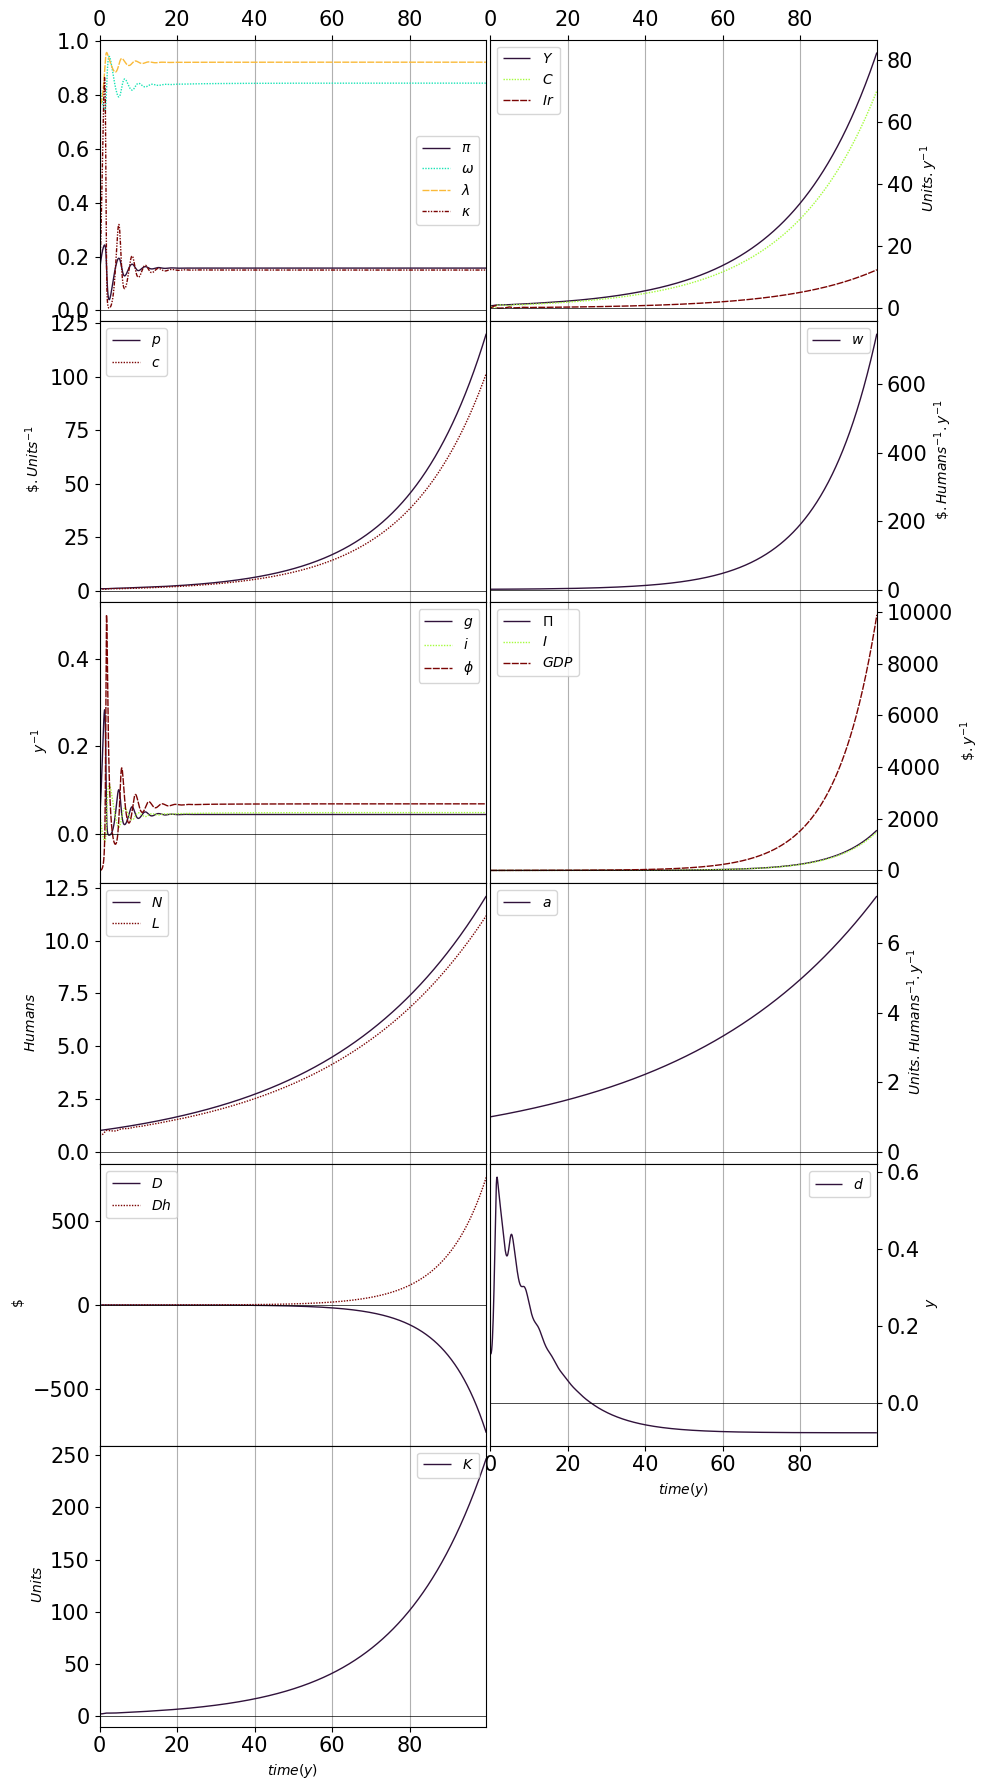

In [3]:
# By default
chm.Plots.plotbyunits(hub)

## Filtering

Filters work as follow: 
* If the filter is a list [] then only the elements inside are selected
* If the filter is a tuple () then only the elements inside are excluded

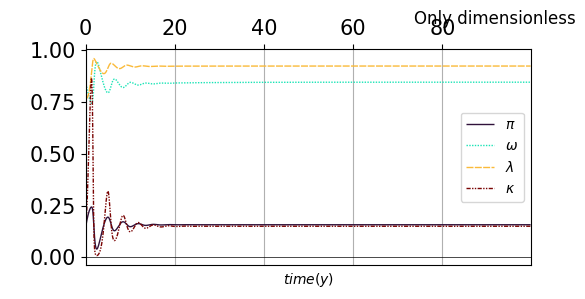

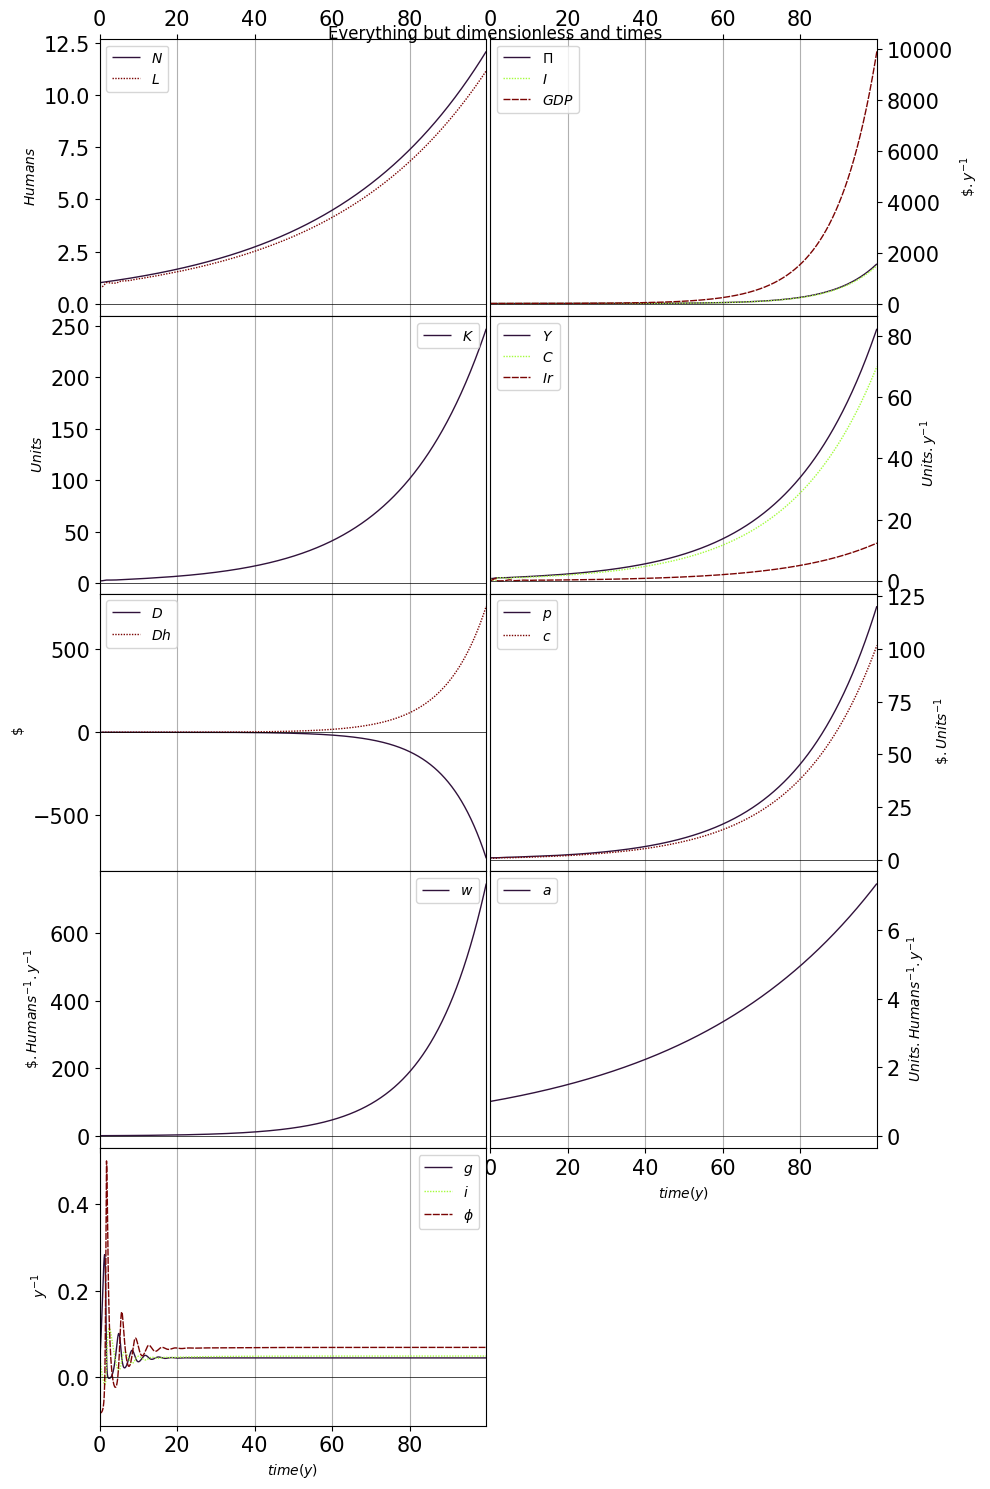

In [23]:
chm.Plots.plotbyunits(hub,filters_units=['',],title='Only dimensionless') ### Only the dimensionless units
chm.Plots.plotbyunits(hub,filters_units=('','y'),title='Everything but dimensionless and times') ### Everything but the dimensionless units
# You can see that the title is badly placed !

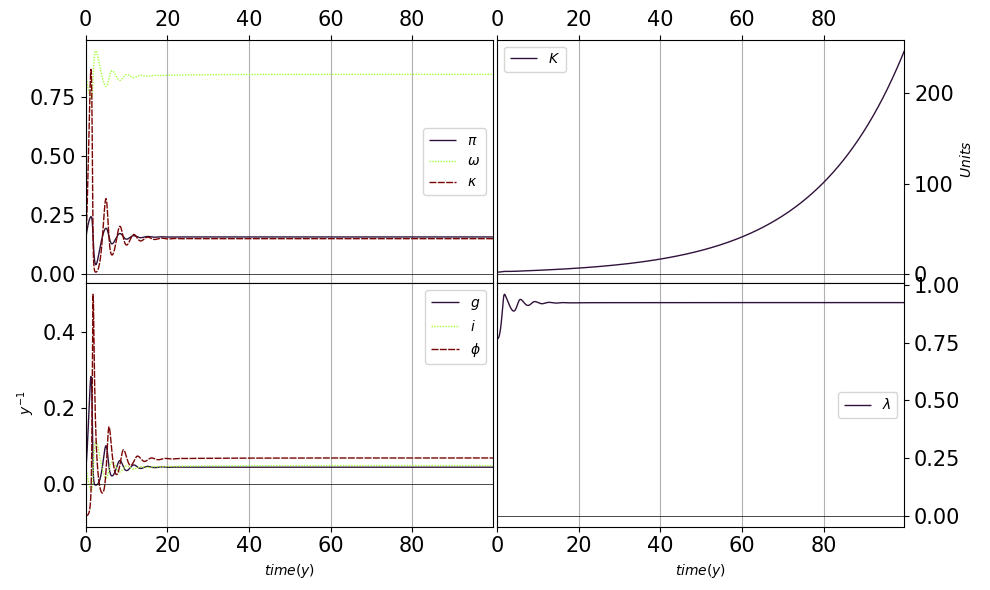

In [24]:
chm.Plots.plotbyunits(hub,filters_units=['','y^{-1}','Units'],separate_variables={'':['employment']})

## Filtering in multisectoral 

When you have multiple sectors or agents, the plot by default is putting everything, and that's messy. You can select only a few sectors 

loading: C:\Users\Paul Valcke\Documents\GitHub\CHIMES\saves\E-CHIMES_CLEAN.chm
file Loaded!
Description: E-CHIMES at the core

Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'Phi0', 'z', 'apond', 'alpha', 'n', 'delta', 'inflation', 'gammai', 'r', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'Phi1']
Changes Ignored:['Phinull', 'eta', 'mu0', 'chi', 'A', 'employment', 'a', 'w', 'Tsim', 'dt']
Now Nprod has 3 sectors with names ['Consumption', 'Intermediate', 'Investment']

time step 1000 / 1000
time step 1000 / 1000


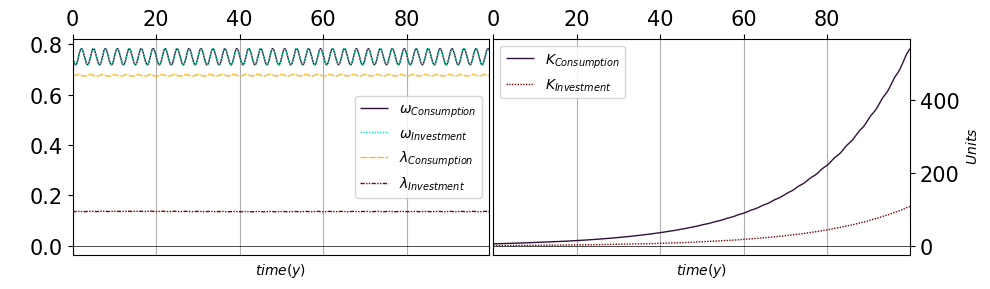

In [19]:
hubECHIMES=chm.load('E-CHIMES_CLEAN')
dfields0=hubECHIMES.supplements['generateNgoodwin'](3)
dfields0['Nprod']=['Consumption','Intermediate','Investment']
dfields0['Gamma'] = [[0.0,0.1 ,0],
                    [0  ,0.1 ,0],
                    [0.0,0.1 ,0]]
dfields0['Xi'] =  [[0.0,0,1],
                  [0.0,0,1],
                  [0.0,0,1]]
dfields0['Cpond']=[1,0,0]
dfields0['p'] = hubECHIMES.supplements['pForROC'](dfields0)
K= hubECHIMES.supplements['Kfor0dotV'](dfields0)
K*=dfields0['employment']*dfields0['N']/np.sum(K/dfields0['a']) # homotetic scaling for employment and N
dfields0['K']= K

hubECHIMES.set_dfields(**dfields0)
hubECHIMES.run()

chm.Plots.plotbyunits(hubECHIMES,filters_key=['employment','omega','K'],
                      filters_sector=['Consumption','Investment'])

# Parrallel systems 




Changing Dimensions: ['nx']
Changing Fields: ['alpha']
Now nx has 3 sectors with names ['First', 'Second', 'Third']

Changing Dimensions: ['Tsim']

time step 200 / 200
time step 200 / 200


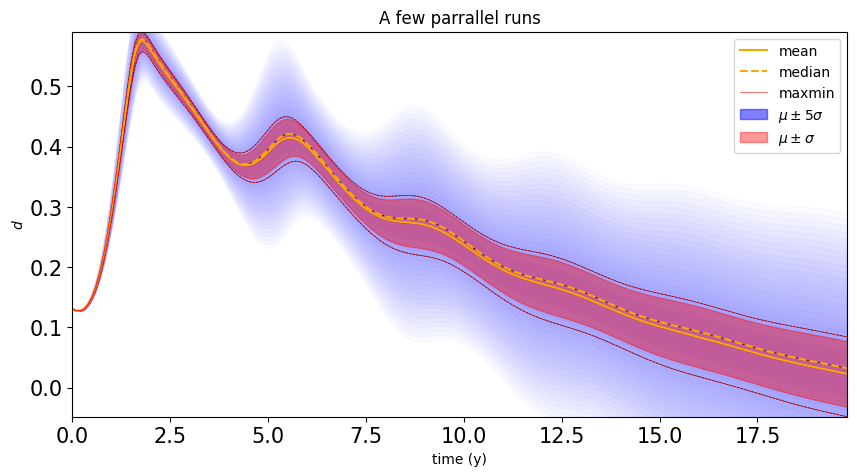

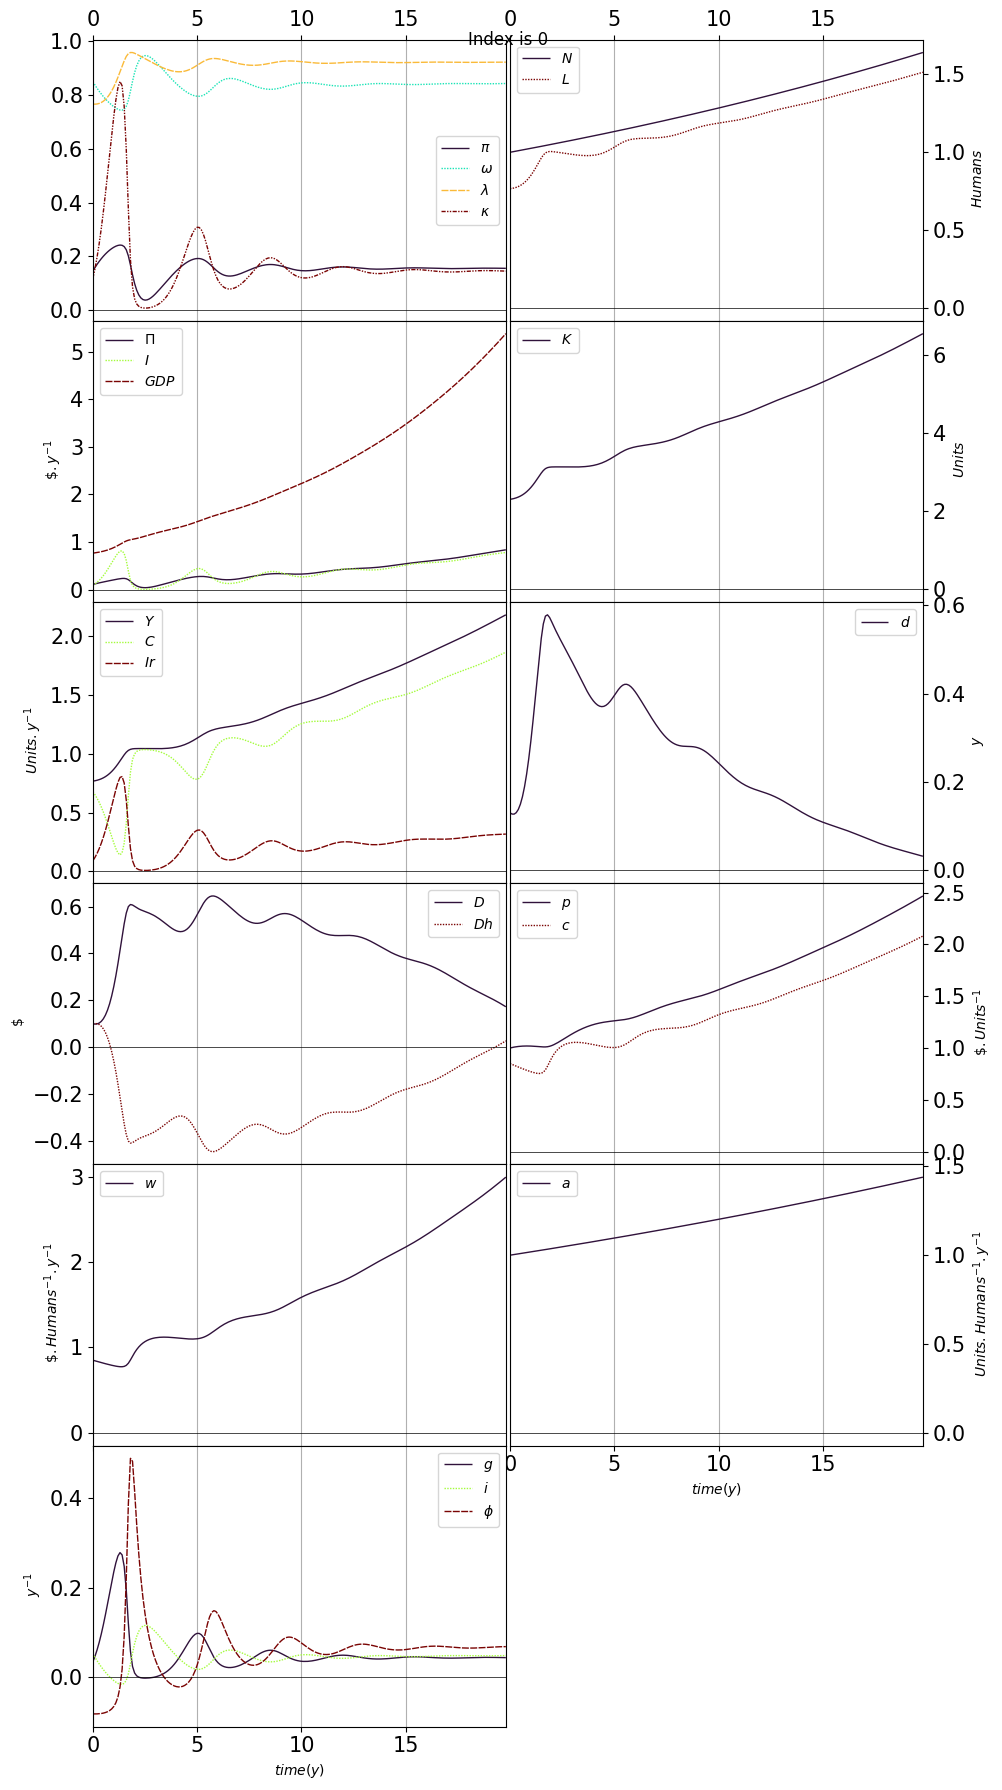

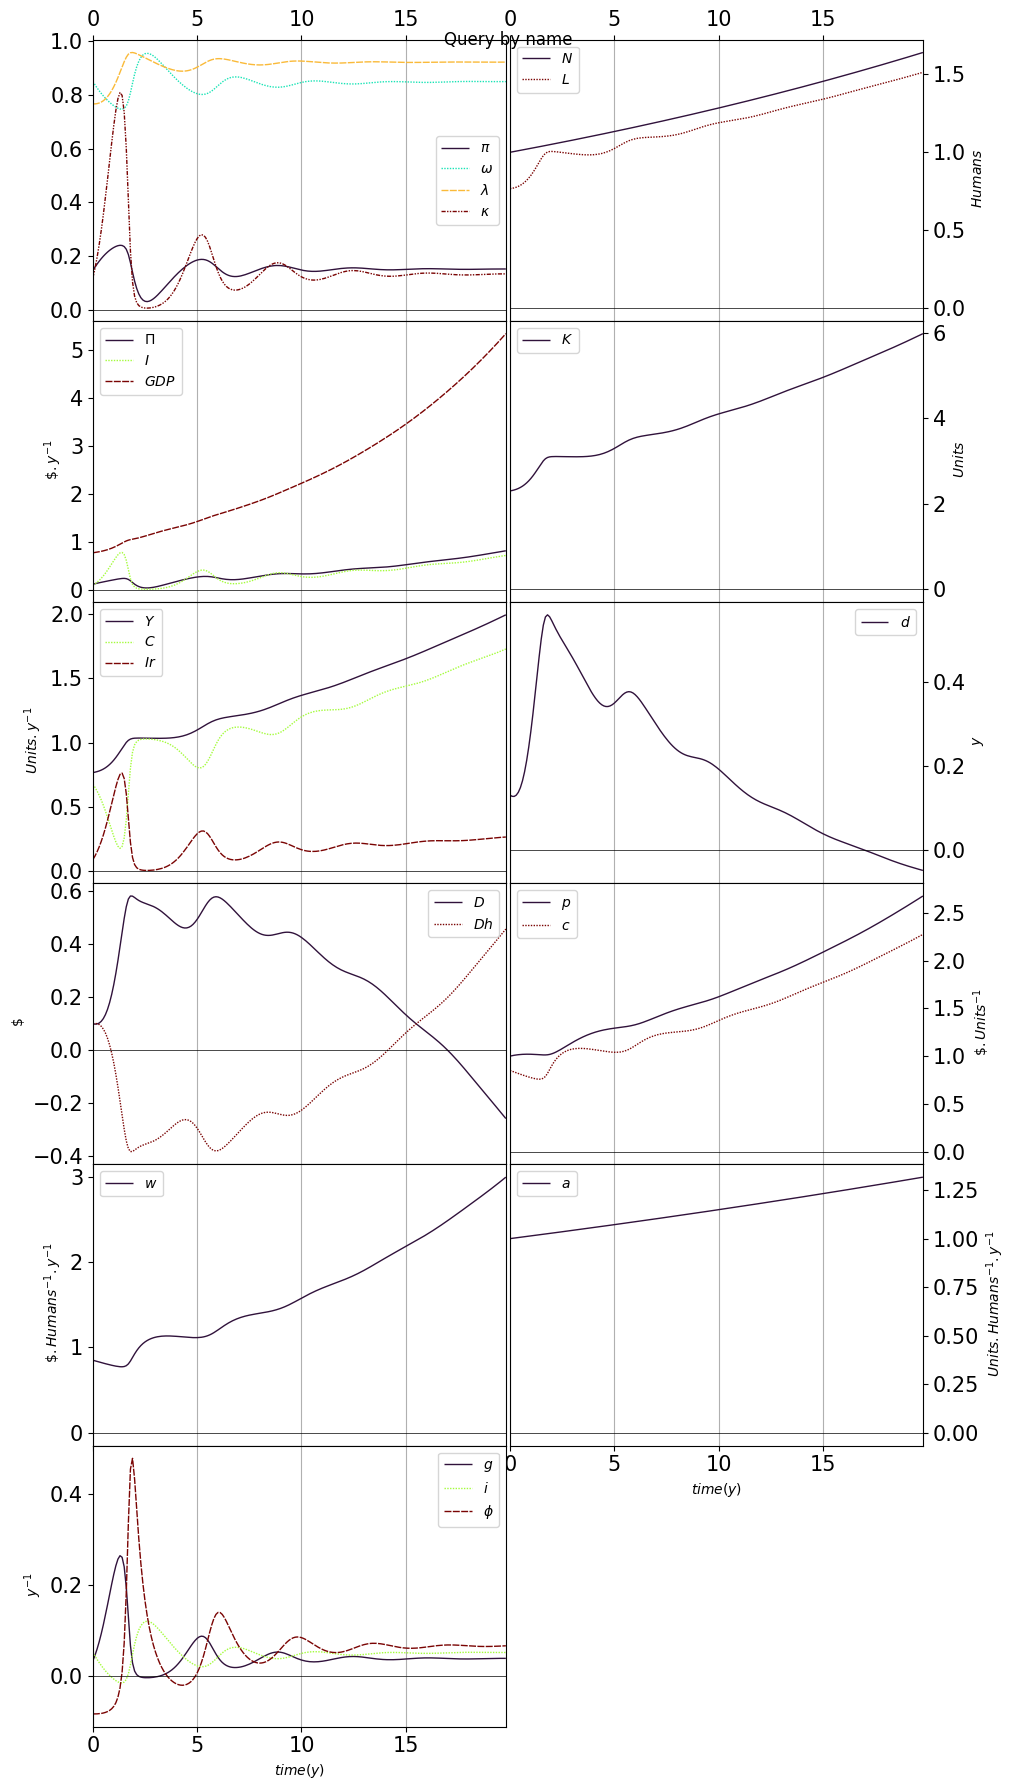

In [33]:
presetCoupled = chm.generate_dic_distribution({'alpha': {'mu': 0.02,
               'sigma': 0.5*0.02,
               'type': 'log'}, },
                                              N=3)
hub=chm.Hub('GK',verb=False)
presetCoupled['nx']=['First','Second','Third']
hub.set_dfields(**presetCoupled)
hub.set_dfields('Tsim',20)
hub.run()
hub.calculate_StatSensitivity()

#for var in ['employment','omega','d']:
chm.Plots.Var(hub,'d',mode='sensitivity',title='A few parrallel runs')

chm.Plots.plotbyunits(hub,idx=0,title='Index is 0')
chm.Plots.plotbyunits(hub,idx='Second',title='Query by name')

## Time selection

When boolean, goes as far as it can

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']

time step 1000 / 1000
time step 1000 / 1000


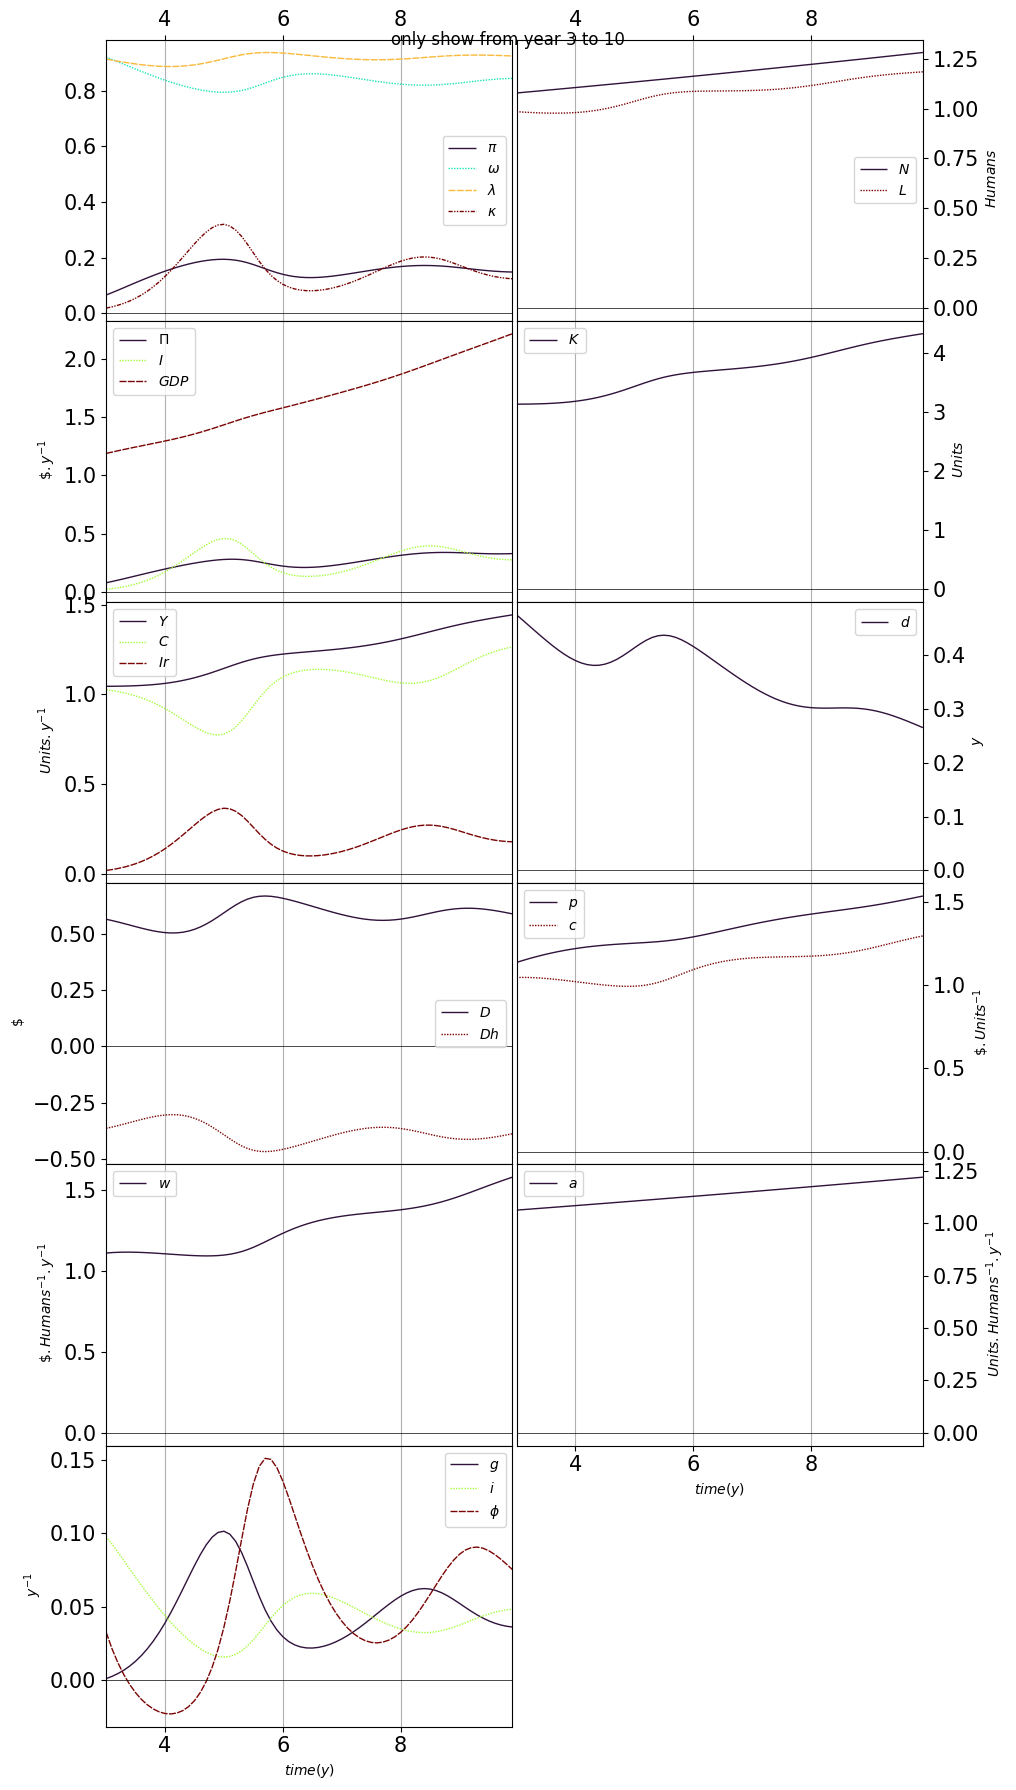

In [36]:
hub=chm.Hub('GK')
hub.run()
chm.Plots.plotbyunits(hub,tini=3,tend=10,title='only show from year 3 to 10')

## ReturnFig

In [37]:
FIG=chm.Plots.plotbyunits(hub,returnFig=True)

In [45]:
FIG.axes


[<AxesSubplot: xlabel='$time (y)$', ylabel='$\\    \\ $'>,
 <AxesSubplot: xlabel='$time (y)$', ylabel='$\\  Humans  \\ $'>,
 <AxesSubplot: ylabel='$\\  \\$.y^{-1}  \\ $'>,
 <AxesSubplot: ylabel='$\\  Units  \\ $'>,
 <AxesSubplot: ylabel='$\\  Units.y^{-1}  \\ $'>,
 <AxesSubplot: ylabel='$\\  y  \\ $'>,
 <AxesSubplot: ylabel='$\\  \\$  \\ $'>,
 <AxesSubplot: ylabel='$\\  \\$.Units^{-1}  \\ $'>,
 <AxesSubplot: ylabel='$\\  \\$.Humans^{-1}.y^{-1}  \\ $'>,
 <AxesSubplot: xlabel='$time (y)$', ylabel='$\\  Units.Humans^{-1}.y^{-1}  \\ $'>,
 <AxesSubplot: xlabel='$time (y)$', ylabel='$\\  y^{-1}  \\ $'>]